<a href="https://colab.research.google.com/github/ltrinh74123/Image_classification/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
ndata = 10000
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
X_train = X_train[:ndata, :, :, :]
y_train = y_train[:ndata, :]


In [2]:
classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
y_labels = np.argmax(y_train, axis=1)
y_classes = [classes[label] for label in y_labels]
y_series = pd.Series(y_classes, name="Class")


In [3]:
import keras
from keras.layers import InputLayer, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Activation
import numpy as np
from tensorflow.random import set_seed
from keras.callbacks import EarlyStopping

In [13]:
model = keras.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)

Epoch 1/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2415 - loss: 2.0537 - val_accuracy: 0.3913 - val_loss: 1.6467
Epoch 2/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.4403 - loss: 1.5341 - val_accuracy: 0.4458 - val_loss: 1.4953
Epoch 3/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5227 - loss: 1.3352 - val_accuracy: 0.5156 - val_loss: 1.3427
Epoch 4/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5725 - loss: 1.2016 - val_accuracy: 0.5476 - val_loss: 1.2953
Epoch 5/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6061 - loss: 1.1211 - val_accuracy: 0.5502 - val_loss: 1.3077
Epoch 6/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6389 - loss: 1.0231 - val_accuracy: 0.5651 - val_loss: 1.2403
Epoch 7/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6626 - loss: 0.9589 - val_accuracy: 0.5698 - val_loss: 1.2730
Epoch 8/25
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6988 - loss: 0.8602 - val_accuracy: 

In [ ]:
model.summary()

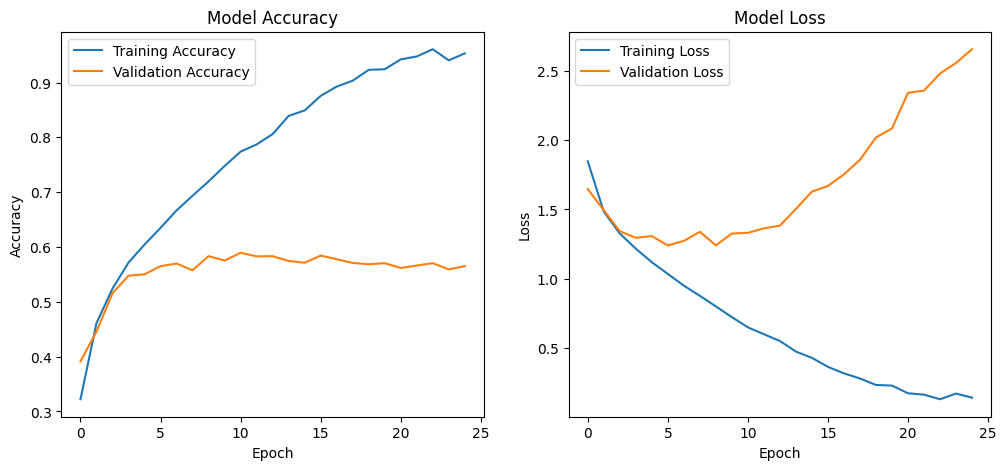

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [10]:
import numpy as np
np.random.seed(0)
random_10 = np.random.randint(0, 10000, size=10).astype(int)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


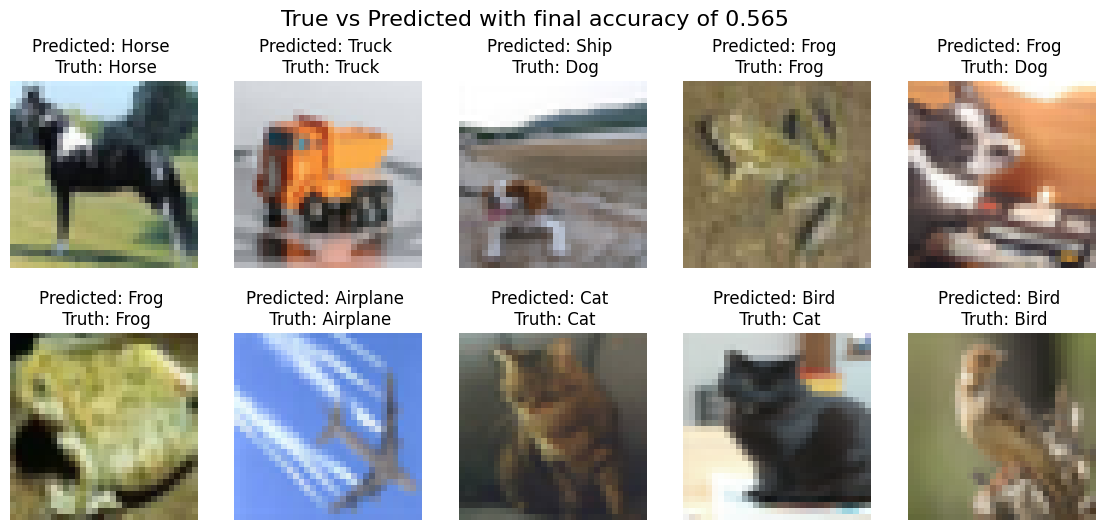

In [15]:
predictions = model.predict(X_test)
predict_labels = np.argmax(predictions, axis=1)

y_test_labels = np.argmax(y_test, axis=1)

predict = predict_labels[random_10]
truth = y_test_labels[random_10]
image = X_test[random_10]
predict_labels = [classes[label] for label in predict]
truth_labels = [classes[label] for label in truth]

plt.figure(figsize = (14,6))
for i in range(10):
  plt.subplot(2, 5, i + 1)  # Layout: 2 rows, 5 columns, index i+1
  plt.imshow(image[i])
  plt.axis('off')
  plt.title(f'Predicted: {predict_labels[i]} \n Truth: {truth_labels[i]}')
plt.suptitle(f"True vs Predicted with final accuracy of {round(accuracy, 3)}", size = 16)
plt.show()


In [4]:
import scipy.ndimage
import numpy as np
import scipy.ndimage
from skimage.util import random_noise

def image_augmentation(train_images, augmentation_factor):
    new_images = []
    for _ in range(augmentation_factor):
        for image in train_images:
            aug_image = image.copy()

            if np.random.rand() < 0.5:
                aug_image = np.fliplr(aug_image)

            shift_x = np.random.randint(-5, 5)
            shift_y = np.random.randint(-5, 5)
            aug_image = scipy.ndimage.shift(aug_image, (shift_y, shift_x, 0), mode='reflect')

            rotation = np.random.uniform(-20, 20)
            aug_image = scipy.ndimage.rotate(aug_image, rotation, reshape=False, mode='reflect')

            brightness = np.random.uniform(0.8, 1.2)
            aug_image = aug_image * brightness

            if np.random.rand() < 0.8:
              contrast = np.random.uniform(0.8, 1.2)
              mean = np.mean(aug_image, axis=(0, 1), keepdims=True)
              aug_image = (aug_image - mean) * contrast + mean

            if np.random.rand() < 0.3:
                aug_image = random_noise(aug_image, mode='gaussian', var=0.005)

            aug_image = np.clip(aug_image, 0, 1)
            new_images.append(aug_image)

    return np.array(new_images)



In [5]:
num_aug = 9
train_aug = image_augmentation(X_train, num_aug)
X_train_new = np.concatenate((X_train, train_aug), axis=0)
y_train_new = np.array(y_train.tolist() * (num_aug +1))


In [6]:
early_stop = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

In [7]:

# model2.add(Activation('relu'))

from keras.optimizers import Adam
from keras.regularizers import l2

model2 = keras.Sequential()

# Block 1
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4), input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# Block 2
model2.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# Block 3
model2.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

model2.add(Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Dropout(0.2))

# Fully connected
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_regularizer=l2(1e-4)))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(10, activation='softmax'))

# Compile
model2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_new, y_train_new, epochs=25, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop])
loss, accuracy = model2.evaluate(X_test, y_test)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 24ms/step - accuracy: 0.3700 - loss: 1.9919 - val_accuracy: 0.6655 - val_loss: 1.0974
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 16ms/step - accuracy: 0.6558 - loss: 1.1317 - val_accuracy: 0.7019 - val_loss: 1.0761
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.7365 - loss: 0.9666 - val_accuracy: 0.7395 - val_loss: 1.0396
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - accuracy: 0.7844 - loss: 0.9019 - val_accuracy: 0.7688 - val_loss: 1.0195
Epoch 5/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8143 - loss: 0.8780 - val_accuracy: 0.7635 - val_loss: 1.0843
Epoch 6/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8355 - loss: 0.8634 - val_accuracy: 0.8049 - val_loss: 1.0062
Epoch 7/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.8466 - loss: 0.8647 - val_accuracy: 0.7595 - val_loss: 1.2393
Epoch 8/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 16ms/step - accuracy: 0.8603 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


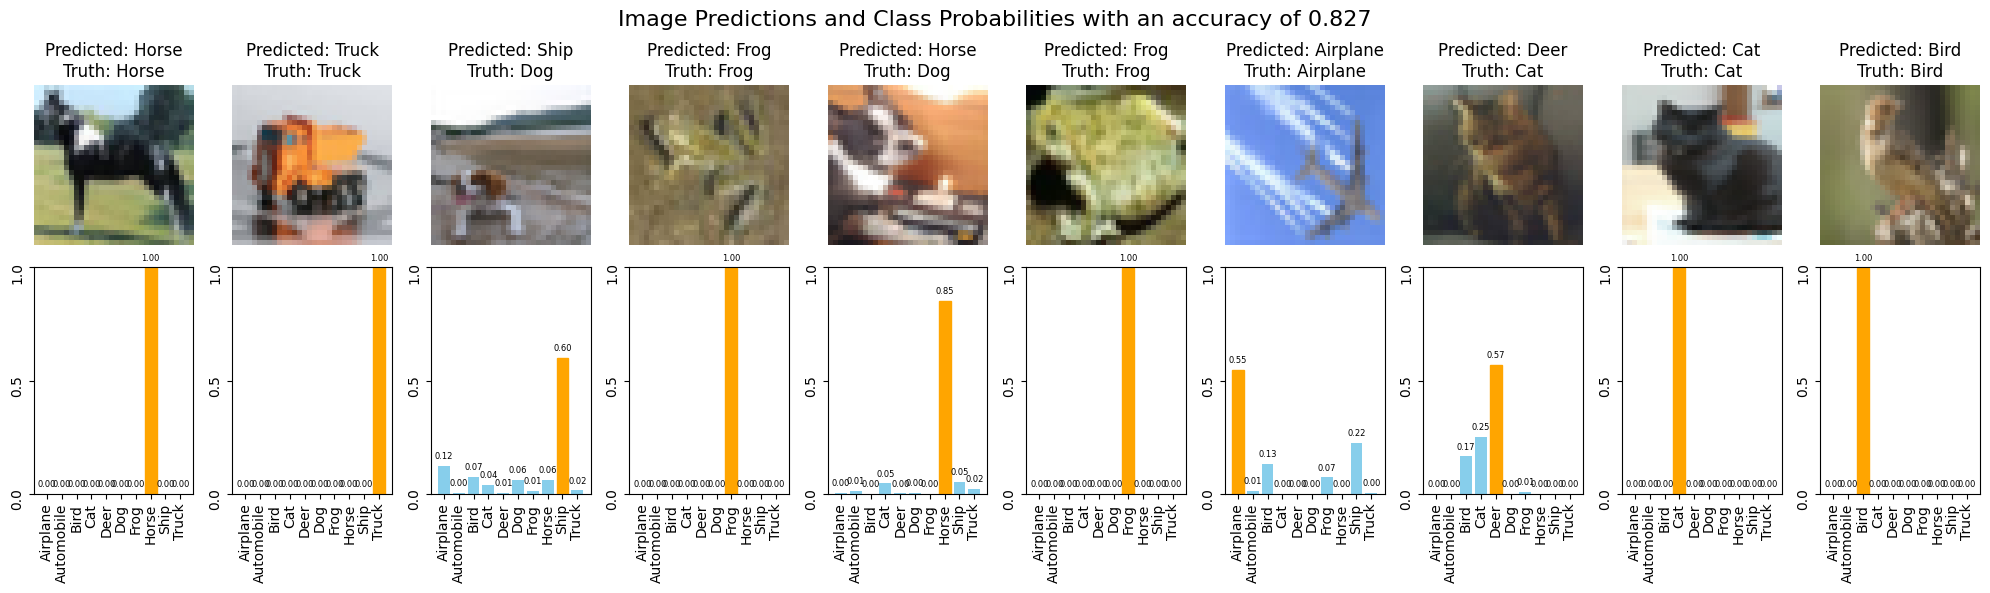

In [11]:
predictions = model2.predict(X_test)
predict_labels = np.argmax(predictions, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

probs = predictions[random_10]
predict = predict_labels[random_10]
truth = y_test_labels[random_10]
image = X_test[random_10]

predict_labels = [classes[label] for label in predict]
truth_labels = [classes[label] for label in truth]

fig, axes = plt.subplots(2, 10, figsize=(20, 6))
fig.suptitle(f"Image Predictions and Class Probabilities with an accuracy of {accuracy:.3f}", fontsize=16)

for idx in range(10):
    # Plot image
    axes[0, idx].imshow(image[idx])
    axes[0, idx].axis('off')
    axes[0, idx].set_title(f"Predicted: {predict_labels[idx]}\nTruth: {truth_labels[idx]}")

    # Plot classes probs
    bars = axes[1, idx].bar(classes, probs[idx], color='skyblue')
    bars[predict[idx]].set_color('orange')
    axes[1, idx].set_ylim(0, 1)
    axes[1, idx].tick_params(labelrotation=90)
    axes[1, idx].set_yticks([0.0, 0.5, 1.0])
    for j, p in enumerate(probs[idx]):
        axes[1, idx].text(j, p + 0.03, f"{p:.2f}", ha='center', fontsize=6)

plt.tight_layout()
plt.show()


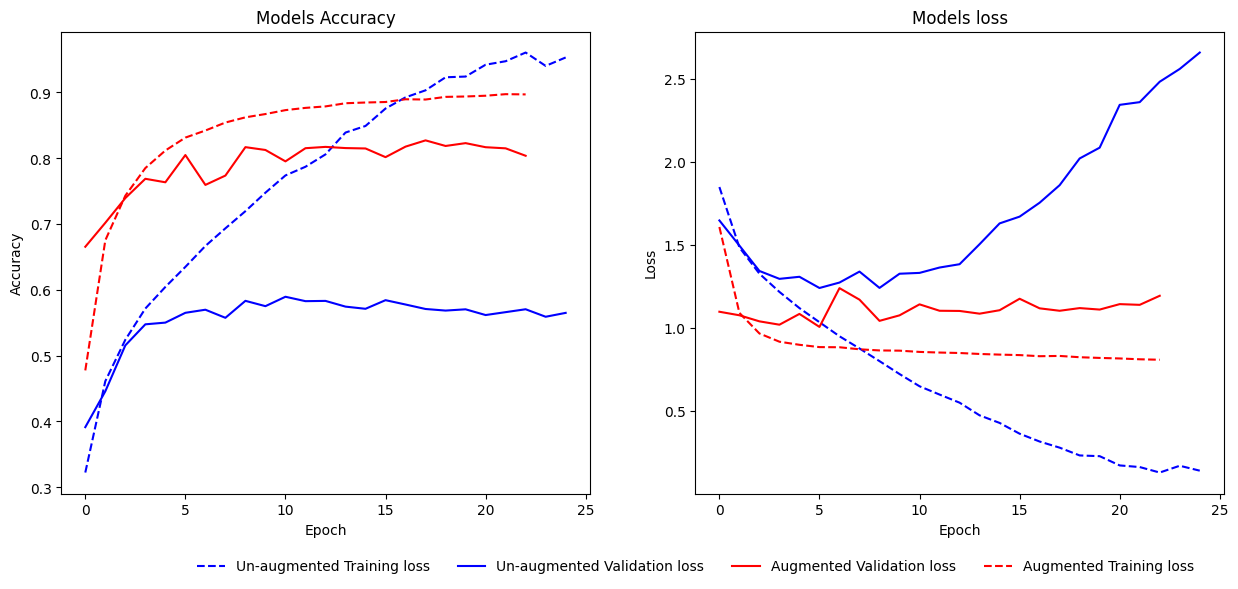

In [29]:
plt.figure(figsize = (15, 6))
plt.subplot (1, 2, 1)
plt.plot(history.history['accuracy'], label='Un-augmented Training Accuracy', linestyle='--', color = "blue")
plt.plot(history2.history['accuracy'], label='Augmented Training Accuracy', linestyle='--', color = "red")
plt.plot(history.history['val_accuracy'], label='Un-augmented Validation Accuracy', color = "blue")
plt.plot(history2.history['val_accuracy'], label='Augmented Validation Accuracy', color = "red")
plt.title('Models Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


plt.subplot (1, 2, 2)
plt.plot(history.history['loss'], label='Un-augmented Training loss', linestyle='--', color = "blue" )
plt.plot(history.history['val_loss'], label='Un-augmented Validation loss', color = "blue")
plt.plot(history2.history['val_loss'], label='Augmented Validation loss', color = "red")
plt.plot(history2.history['loss'], label='Augmented Training loss', linestyle='--', color = "red" )
plt.title('Models loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower center', bbox_to_anchor=(0, -0.2), ncol=4, frameon=False)
# plt.legend(loc='none')
plt.show()